In [57]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
FILE = 'Сводная вегетация.xlsx'

In [97]:
xls = pd.ExcelFile(FILE, on_demand=True)
xls.sheet_names

['2016',
 '2015',
 '2014',
 '2013',
 '2012',
 'по полям',
 'зимний анализ',
 'Модель Озимая пшеница']

In [98]:
df = pd.read_excel(FILE, sheetname='2014', header=1)
df.head()

,Каталог групп полей,Группа полей,Поле,"Расчетная площадь, га","Официальная площадь, га","Обрабатываемая площадь, га",Культура 2013,Культура (Короткое название) 2013,Культура 2014,Культура (Короткое название) 2014,...,неделя 10,неделя 09,неделя 08,неделя 07,неделя 06,неделя 05,неделя 04,неделя 03,неделя 02,неделя 01
0,Свитанок,Масив 1,10,2.93,2.93,2.93,Пар,NaN,Подсолнечник,NaN,...,0.330,0.295,NaN,NaN,NaN,NaN,NaN,NaN,0.277,0.276
1,Свитанок,Масив 1,100,15.89,15.89,15.89,Кукуруза,NaN,Подсолнечник,NaN,...,0.290,0.292,NaN,NaN,NaN,NaN,NaN,NaN,0.315,0.319
2,Свитанок,Масив 1,101,7.80,7.80,7.80,NaN,NaN,Подсолнечник,NaN,...,0.273,0.273,NaN,NaN,NaN,NaN,NaN,NaN,0.268,0.267
3,Свитанок,Масив 1,105,2.13,2.13,2.13,Кукуруза,NaN,Подсолнечник,NaN,...,0.334,0.333,NaN,NaN,NaN,NaN,NaN,NaN,0.335,0.238
4,Свитанок,Масив 1,106,5.86,5.86,5.86,Кукуруза,NaN,Подсолнечник,NaN,...,0.329,0.314,NaN,NaN,NaN,NaN,NaN,NaN,0.302,0.278


In [85]:
df.columns

Index(['Каталог групп полей', 'Группа полей', 'Поле', 'Расчетная площадь, га',
       'Официальная площадь, га', 'Обрабатываемая площадь, га',
       'Культура 2013', 'Культура (Короткое название) 2013', 'Культура 2014',
       'Культура (Короткое название) 2014', 'Культура 2015',
       'Культура (Короткое название) 2015', 'Сорт', 'Урожайность, т./га.',
       'Плановая урожайность по Cropo, т./га.', 'Дата сева', 'Дата уборки',
       'неделя 52', 'неделя 51', 'неделя 50', 'неделя 49', 'неделя 48',
       'неделя 47', 'неделя 46', 'неделя 45', 'неделя 44', 'неделя 43',
       'неделя 42', 'неделя 41', 'неделя 40', 'неделя 39', 'неделя 38',
       'неделя 37', 'неделя 36', 'неделя 35', 'неделя 34', 'неделя 33',
       'неделя 32', 'неделя 31', 'неделя 30', 'неделя 29', 'неделя 28',
       'неделя 27', 'неделя 26', 'неделя 25', 'неделя 24', 'неделя 23',
       'неделя 22', 'неделя 21', 'неделя 20', 'неделя 19', 'неделя 18',
       'неделя 17', 'неделя 16', 'неделя 15', 'неделя 14', 'нед

In [117]:
NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
CULTURE_COLUMN = 'Культура 2014'
YIELD_COLUMN = 'Урожайность, т./га.'

print(NDVI_COLUMNS)

['неделя 52', 'неделя 51', 'неделя 50', 'неделя 49', 'неделя 48', 'неделя 47', 'неделя 46', 'неделя 45', 'неделя 44', 'неделя 43', 'неделя 42', 'неделя 41', 'неделя 40', 'неделя 39', 'неделя 38', 'неделя 37', 'неделя 36', 'неделя 35', 'неделя 34', 'неделя 33', 'неделя 32', 'неделя 31', 'неделя 30', 'неделя 29', 'неделя 28', 'неделя 27', 'неделя 26', 'неделя 25', 'неделя 24', 'неделя 23', 'неделя 22', 'неделя 21', 'неделя 20', 'неделя 19', 'неделя 18', 'неделя 17', 'неделя 16', 'неделя 15', 'неделя 14', 'неделя 13', 'неделя 12', 'неделя 11', 'неделя 10', 'неделя 09', 'неделя 08', 'неделя 07', 'неделя 06', 'неделя 05', 'неделя 04', 'неделя 03', 'неделя 02', 'неделя 01']


In [100]:
df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()

In [101]:
df_cultures.head()

,"Расчетная площадь, га","Официальная площадь, га","Обрабатываемая площадь, га",Культура (Короткое название) 2013,Культура (Короткое название) 2014,Культура (Короткое название) 2015,"Урожайность, т./га.","Плановая урожайность по Cropo, т./га.",неделя 52,неделя 51,...,неделя 10,неделя 09,неделя 08,неделя 07,неделя 06,неделя 05,неделя 04,неделя 03,неделя 02,неделя 01
Культура 2014,,,,,,,,,,,,,,,,,,,,,
Кукуруза,37.724000,38.976000,38.976000,NaN,NaN,NaN,3.049583,3.537600,NaN,NaN,...,0.282200,0.278480,NaN,NaN,NaN,NaN,NaN,NaN,0.272600,0.268120
Пар,25.150000,25.150000,25.150000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.268000,0.276000,NaN,NaN,NaN,NaN,NaN,NaN,0.275000,0.271000
Подсолнечник,31.463148,31.645370,31.727222,NaN,NaN,NaN,2.185962,2.033889,NaN,NaN,...,0.286241,0.287407,NaN,NaN,NaN,NaN,NaN,NaN,0.287889,0.298241
Пшеница озимая,39.690476,39.907143,39.907143,NaN,NaN,NaN,4.244634,3.704286,NaN,0.181,...,0.414833,0.418095,NaN,NaN,NaN,NaN,NaN,NaN,0.425690,0.397000
Рапс озимый,29.225000,29.225000,29.225000,NaN,NaN,NaN,2.335000,2.687500,NaN,NaN,...,0.388250,0.401250,NaN,NaN,NaN,NaN,NaN,NaN,0.476500,0.447500


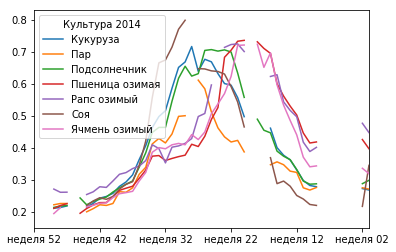

In [102]:
df_cultures[NDVI_COLUMNS].T.plot()

In [103]:
df.shape

(155, 69)

In [146]:
df_wheat = df[df[CULTURE_COLUMN] == 'Пшеница озимая']

In [147]:
wheat_ndvi = df_wheat[NDVI_COLUMNS].T.mean().T
wheat_yield = df_wheat[YIELD_COLUMN]

df_wheat = pd.concat([wheat_ndvi, wheat_yield], axis=1)
df_wheat.columns = ['NDVI', 'Yield']
df_wheat.head()

,NDVI,Yield
5,0.483135,6.13
6,0.482676,6.95
7,0.485730,6.23
9,0.420605,3.10
10,0.420342,4.72


In [151]:
df_wheat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 5 to 143
Data columns (total 2 columns):
NDVI     42 non-null float64
Yield    41 non-null float64
dtypes: float64(2)
memory usage: 2.2 KB


In [153]:
df_wheat = df_wheat.dropna()
df_wheat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 5 to 143
Data columns (total 2 columns):
NDVI     41 non-null float64
Yield    41 non-null float64
dtypes: float64(2)
memory usage: 984.0 bytes


In [154]:
np.corrcoef(df_wheat.NDVI, df_wheat.Yield)

array([[ 1.       ,  0.7523363],
       [ 0.7523363,  1.       ]])

In [157]:
stats.ttest_ind(df_wheat.NDVI, df_wheat.Yield)

Ttest_indResult(statistic=-16.978669646731582, pvalue=3.0023551929916378e-28)